# Exercise W3 Lecture 6

In [27]:
# imports
import numpy as np
from scipy.ndimage import uniform_filter1d
from scipy.stats import shapiro
from matplotlib import pyplot as plt
import pandas

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Load

In [2]:
gmst = pandas.read_table('../Data/GMST_1880_2020_NASA.txt', delim_whitespace=True,skiprows=5,
                       names=['year', 'SST', 'eSST'])

# Fit a linear trend

In [4]:
x = gmst.year.values
X = sm.add_constant(x)
Y = gmst.SST.values
e = gmst.eSST.values

In [5]:
model = sm.OLS(Y, X).fit()

In [6]:
predictions = model.predict(X) 

## Plot

<Figure size 432x288 with 0 Axes>

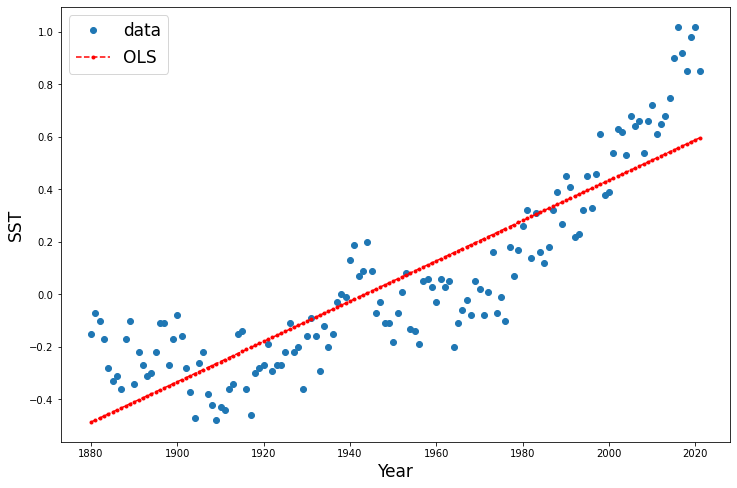

In [7]:
plt.clf()
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
ax.plot(x, Y, "o", label="data")
#ax.plot(x, y_true, "b-", label="True")
ax.plot(x, model.fittedvalues, "r--.", label="OLS")
#ax.plot(x, iv_u, "r--")
#ax.plot(x, iv_l, "r--")
ax.legend(loc="best", fontsize=17)
ax.set_xlabel('Year', fontsize=17)
ax.set_ylabel('SST', fontsize=17)
plt.show()

----

## Durbin Watson

### https://www.geeksforgeeks.org/statsmodels-durbin_watson-in-python/ 

In [9]:
resids = Y - model.fittedvalues

In [10]:
dw = durbin_watson(resids)
dw

0.3827971518518525

### As the value is close to 0, this indicates a positive serial correlation

----

# Cochrane-Orcutt

In [17]:
def co_stat(resid):
    numer = np.sum(resid[1:]*resid[:-1])
    denom = np.sum(resid**2)
    return numer/denom

In [19]:
rho_hat = co_stat(resids)
rho_hat

0.7890656881420253

----

# Transform

## https://online.stat.psu.edu/stat501/lesson/14/14.4 

In [21]:
x_star = x[1:] - rho_hat * x[:-1]
Y_star = Y[1:] - rho_hat * Y[:-1]

## Fit

In [22]:
X_star = sm.add_constant(x_star)

In [23]:
co_model = sm.OLS(Y_star, X_star).fit()

## Plot

<Figure size 432x288 with 0 Axes>

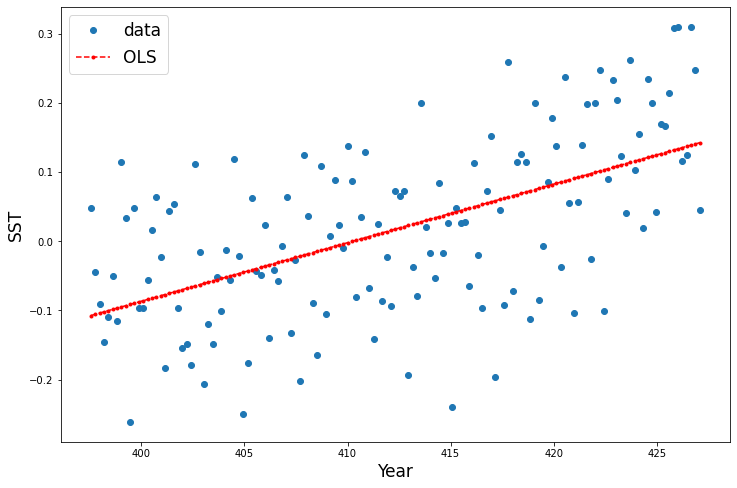

In [24]:
plt.clf()
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
ax.plot(x_star, Y_star, "o", label="data")
#ax.plot(x, y_true, "b-", label="True")
ax.plot(x_star, co_model.fittedvalues, "r--.", label="OLS")
#ax.plot(x, iv_u, "r--")
#ax.plot(x, iv_l, "r--")
ax.legend(loc="best", fontsize=17)
ax.set_xlabel('Year', fontsize=17)
ax.set_ylabel('SST', fontsize=17)
plt.show()

----

# New Durbin

In [25]:
resids_star = Y_star - co_model.fittedvalues

In [26]:
dw_star = durbin_watson(resids_star)
dw_star

2.1713759769157686

----

# Shapiro Wilk

In [28]:
shapiro(resids_star)

ShapiroResult(statistic=0.9855166077613831, pvalue=0.1446356177330017)

## Not much greater than 0.05, but if that is the standard then the data are normal enough

----

# Bartlett ??